# Supervised Learning with scikit-learn (kNN)

In [1]:
# Importing pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importing the course datasets 
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')

# k-Nearest Neighbors

kNN is used for matching based on distance (Euclidean or Manhatten). k is here the hyperparameter which is used to set the number of the nearest neighbors which are used to predict the value.

In the following example, telecomunications churn data is used to train a kNN model aiming to predict consumer churn. Hereby, I use all 3333 observations to train the model with account length and the number of customer service calls as features. An example dataset of three observations are used to compute predictions.

In [4]:
# Import telecominication churn data
churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")

# Dataset
churn_df[["churn", "account_length", "customer_service_calls"]].describe()

,churn,account_length,customer_service_calls
count,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,1.562856
std,0.352067,39.822106,1.315491
min,0.000000,1.000000,0.000000
25%,0.000000,74.000000,1.000000
50%,0.000000,101.000000,1.000000
75%,0.000000,127.000000,2.000000
max,1.000000,243.000000,9.000000


In [43]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Split data into X and y
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [44]:
# Additional data
X_new = np.array([[ 35,  20], [99,  29.1], [217,  12.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [1 1 0]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Validation Set Approach

For testing the model, the data are split into training and test using the train_test_split modeule of scikit learn. The training data is used to train the model whereas the test data is used to test the model and evaluate the MSE (in case of a metric variable) or the precision (qualitative data).

Drwabacks of the validation set approach (Gareth et al. 2023):

1. The validation estimate of the test error rate can be highly variable, depending on pre- cisely which observations are included in the training set and which observations are included in the validation set.

2. In the validation approach, only a subset of the observations — those that are included in the training set rather than in the validation set — are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

## Applying validation set approach on telecomunication churn 

In the following example, the telecomunication data is split into 90% training data and 10% test data. Next, we fit kNN model with k = 6 and compute model accuracy using the test data which equals 85.46 percent which is quite good.

In [29]:
# Import the module
from sklearn.model_selection import train_test_split

# kNN-Model
knn = KNeighborsClassifier(n_neighbors=6)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=52, stratify=y)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print accuracy
print(knn.score(X_test, y_test))

0.8622754491017964


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Next, using validation set approach I train several models for k=1 to k=13 and compute model accuracy for the training and test data. Then, the results are visualized in a graph. It is obvous that the model works always better on the training data than on the test data.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

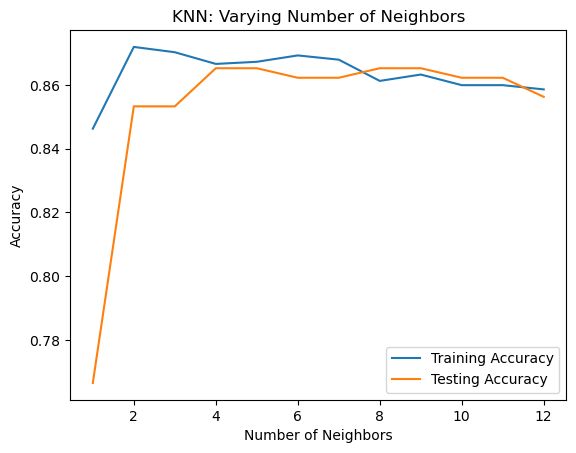

In [30]:
# Create range for neighbors
neighbors = np.arange(1, 13)

train_accuracy = {}
test_accuracy = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracy[neighbor] = knn.score(X_train, y_train)
	test_accuracy[neighbor] = knn.score(X_test, y_test)

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracy.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracy.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# k-fold Cross Validation Approach

The k-fold cross validation approach involves randomly dividing the data into k groups of approximately equal size. The first fold is treated as a test set, and the model is fit on the remaining k − 1 folds. The mean squared error is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which can be averaged to the CV estimate.

## Applying k-fold cross validation approach on telecomunication churn

Next, I apply a k-fold cross validation approach using 10 folds on telecominication churn. The KFold instance is used to define the folding parameters. The cross_val_score instance is used to compute model score which is accuracy in the case of kNN.

In [28]:
# Loading KFold class from model_selection module
from sklearn.model_selection import KFold, cross_val_score

# Defining kfolds for cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Computing CV scores
cv_scores = cross_val_score(knn, X, y, cv=kf)

# Print cv scores 
print(cv_scores)

[0.83832335 0.85928144 0.87125749 0.83783784 0.83483483 0.85885886
 0.88588589 0.87987988 0.84084084 0.85285285]


In [29]:
# Evaluating k-fold
print("Lowest accuracy: {}".format(cv_scores.min()))
print("Highest accuracy: {}".format(cv_scores.max()))
print("Mean Accuracy: {}".format(cv_scores.mean()))

Lowest accuracy: 0.8348348348348348
Highest accuracy: 0.8858858858858859
Mean Accuracy: 0.8559853266440094


# Model fine tuning

## Confusion Matrix

A confusuion matrix is an array for true/false positives and negatives. It is used to compute several model scores which have different intentions when it comes to evaluating a models performance.

## Model metrics

### Accuracy

Accuracy can be interpreted as model goodness. It is defined as the ratio of true positives & true negatives to all observations.

### Preision

Precision is the ratio of true positives to true & false positives. A higher precision implies a lower false positive rate. Or: How many are correctly classified among that class?

### Recall
Recall is the ratio of true positives to true positives & false negatives. A higher recall implies a lowerr false negative rate. Or:  How many of this class you find over the whole number of elements of this class?

### Support
The support is the number of true positives or true negatives in the test data.

### f1-ccore
Weighted harmonic mean of precision and recall. The higher the precision and the higher the recall, the better is the f1-score.

In [30]:
# Defining & training kNN model
knn = KNeighborsClassifier(n_neighbors=neighbor)
knn.fit(X_train, y_train)

# Computing predictions for test data
y_pred = knn.predict(X_test)

# Generate the confusion matrix a
print(confusion_matrix(y_test, y_pred))

[[285   1]
 [ 47   1]]


In [31]:
from sklearn.metrics import classification_report
# Generate the classification report
print(classification_report(y_test, y_pred, target_names = ["Churned", "Not churned"]))

              precision    recall  f1-score   support

     Churned       0.86      1.00      0.92       286
 Not churned       0.50      0.02      0.04        48

    accuracy                           0.86       334
   macro avg       0.68      0.51      0.48       334
weighted avg       0.81      0.86      0.80       334



## Fusion matrix for telecomunication churn

- 41 observations are true positive, i.e. predicted as churned and have cancelled their contract
- 9 observations are false positive, i.e. predicted as churned but have not cancelled their contract
- 13 observations are true negative, i.e. predicted as not churned and have indeed not cancelled their contract
- 14 observations are false negative, i.e. predicted as not chunred but have cancelled their contract

## Model metrics for telecomunication churn

### Accuracy

In this case, model accuracy can be interpreted as the share of correct predictions (true churns, true non-churns) with respect to overall size of the test dataset.

### Precision

Precision is the number of correctly predicted churns relative to the number of predicted churns for the group of true churns in the test data (subsample where churn = 1). Converserly, the second number is the share of correctly predicted non-churns realtive to the overall number of predicted non-churns (subsample where churn = 0).

### Recall

Recall is the share of correctly predicted churns to the total number of true churns in the test data. Converserly, the seocnd number is the share of correctly predicted non-churns relative to number of non-churns in the test data.

### f1-Score

The f1-Score ist the weighted average of precision and recall and  

# Fine tuning a model

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

Fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

In [69]:
# Generate variable to be predicted and matrix with explanatory variables
X = diabetes_df.drop("diabetes", axis = 1).values
y = diabetes_df["diabetes"].values

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize kNN model
knn = KNeighborsClassifier(n_neighbors=6)

# Fit model
knn.fit(X_train, y_train)
        
# Predict y for test data
y_pred = knn.predict(X_test)

In [70]:
# Generate the confusion matrix a
print(confusion_matrix(y_test, y_pred))

[[81 18]
 [24 31]]


# Confusuion Matrix

The confusuion matrix consists of an array for true/false positives and negatives. In the above case, 
- 81 obs are true negatives (have no diabtetes and are predicted being healthy)
- 24 obs are false negatives (have diabetes but are predicted being healthy)
- 18 obs are false positives (have no diabetes but are pedicted having diabetes)
- 31 obs are true positives (have diabetes and are predicted having daibetes)

In [71]:
# Generate the classification report
print(classification_report(y_test, y_pred, target_names = ["No diabetes", "Diabetes"]))

              precision    recall  f1-score   support

 No diabetes       0.77      0.82      0.79        99
    Diabetes       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



# Interpretation

## Preision

- Precision is the ratio of true positives to true & false positives
- A higher precision implies a lower false positive rate
- In case of the above diabetes example, true positive means that a person is predicted having diabetes and this is true in reality. This is the case for 31 out of 49 (true & false positives) cases. Thus, precision iist 0.77 (31/49)

## Recall
- Recall is the ratio of true positives to true positives & false negatives
- A higher recall implies a lowerr false negative rate
- In case of the above diabetes example, a higher recall implies that less persones with diabetes are wrongly diagnosed having not diabetes. The recall equals 31 to 55, i.e. 0.56. This means that out of all persons, who in reality have diabetes, only 56 percent are diagnosed correctly.

## Support
- The support is the number of true positives or true negatives in the test data. In the above case, 99 persons are healthy and 55 persons have diabetes.

## f1-ccore
- Wighted harmonic mean of precision and recall
- The higher the precision and the higher the recall, the better is the f1-score

## Accuracy

- Accuracy can be interpreted as model goodness (true positives & true negatives relative to all)
- In the above example, accuracy equals 112/155 = 0.73.

# Logistic Regression and the ROC curve

## Fitting Logistic Regressions with scikit learn

In this use case, the probability of having diabetes is predicted by training a logistic regression model. The threshold for predicting someone having diabetes is set by 0.5 by defaukt in scikit learn.

In [72]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict values
y_pred_values = logreg.predict(X_test)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])
print(y_pred_values[:10])

[0.27550928 0.1948644  0.1166111  0.16451717 0.46144283 0.43296294
 0.01624534 0.64877747 0.54182916 0.76164325]
[0 0 0 0 0 0 0 1 1 1]


## Computing and visualizing the ROC curve

The ROC (receiver operating characteristic) curve shows the true positve rate on the y-axis and the false positive rate on the x-axis. The diagonal visualizies the axis, when the variable are indistinguishable by the features, i.e. the chance model which randomly guesses labels.

If p = 0 (upper right corner) the model predics all values as positive (1), i.e. all positives are correctly predicted (true positive) but the false positive rate is also at its maximum because the model predicts also all negatives wrongly as positive.

More precisely, since each probability is predicted > 0, all observations are predicted as beeing positive (1), in the case of diabetes, all observations are predicted having diabetes.

If the threshold equals 1, then all observations are predicted negative (0), i.e. all positives are wrongly predicted as negative (false negative) and all negatives are predicted correctly as negative (0).

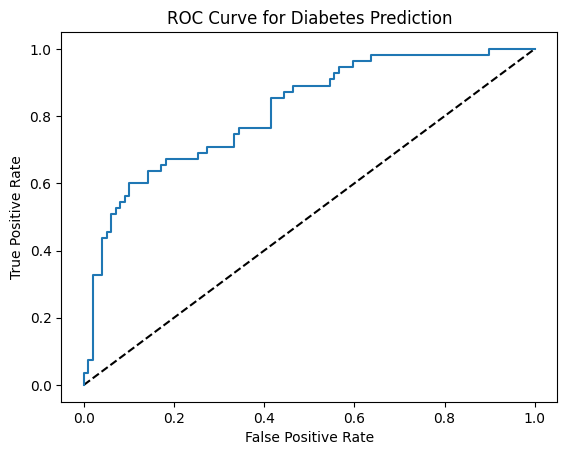

In [73]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# ROC AUC

The ROC AUC is the area under the ROC curve

In [74]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8150596877869605
[[81 18]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



# Hyperparameter tuning

# GridSearchCV

GridsearchCV trains the models for each hyperparameter along the pre-defined grid and is therefore computationally intensive. In scikitlearn, GridSearchCV is implemented in the model_selection module.

In [75]:
# Split diabetes data

X = diabetes_df.drop("diabetes", axis = 1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train Lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

The following GridSearch uses the Lasso model and searches for the best model by training and testing a model for 20 different values of alpha between 0.00001 and 20. 

In [76]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Defining kfolds for cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)

print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.15790315789473686}
Tuned lasso score: 0.2680563190579576


# RandomizedSearchCV